In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

from data_loader import data_label_split
from data_loader import generate_data_set
from data_loader import dmso_taxol_ProfileBag
from data_loader import Xy_standardization
from set_experiment import mini_noise_signal_cv
from set_experiment import train
from set_experiment import test

from model import SmallDeepSet
from model import FullDeepSet
from model import profile_AttSet

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import normalize

import torch
import torch.utils.data as D 
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import torch.nn.functional as F

In [21]:
mini_data = pd.read_csv("mini_moa_data_drop_NA.csv",index_col=0)

In [ ]:
sf_drop_NA_data = mini_data[["compound", "concentration",
                                "moa", "row ID", "Iteration (#2)", "COND",
                               "AreaShape_Area_Nuclei", "AreaShape_Compactness_Nuclei"]]
bagData = dmso_taxol_ProfileBag(mini_data, 60, 100, 10, 0.5, "taxol", "DMSO", 8,0.5)
dataloader = D.DataLoader(bagData, batch_size=1, shuffle=True)

In [ ]:
# X,y = data_label_split(mini_data)
# data = pd.concat([pd.DataFrame(normalize(X), columns = X.columns), y], axis=1, sort = False )

# data = Xy_standardization(mini_data)


In [5]:
x = iter(dataloader).next()[0]#.shape

In [176]:
y_prob, y_hat = model(x.float().cuda())

# Deep Set Model

In [5]:
# full_deepset = SmallDeepSet().cuda()
# optimizer = optim.Adam(full_deepset.parameters(), lr=0.0005, betas=(0.9, 0.999), weight_decay=10e-5)

In [6]:
start = 90
end = 91
data = mini_data
num_bag = 100
bag_size_mean = 100
bag_size_std = 10
treatment = "taxol"
control = "DMSO"
# model = FullDeepSet("mean").cuda()
# optimizer = optimizer
splits = 3
epochs = 20

In [11]:
model = profile_AttSet(481).cuda()

In [8]:
total_params = sum(p.numel() for p in model.parameters())
print(f'{total_params:,} total parameters.')
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f'{total_trainable_params:,} training parameters.')



41,594 total parameters.
41,594 training parameters.


In [85]:
total_params = sum(p.numel() for p in model.parameters())
print(f'{total_params:,} total parameters.')
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f'{total_trainable_params:,} training parameters.')


139,905 total parameters.
139,905 training parameters.


In [12]:
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), weight_decay=10e-5)

In [13]:
results = mini_noise_signal_cv(start, end, data, num_bag,
                               bag_size_mean, bag_size_std, treatment, control, 8,model, optimizer, splits, epochs)


training at different percent:   0%|          | 0/1 [00:00<?, ?it/s]
3 fold cross validation: 0it [00:00, ?it/s]

Epoch: 0, Loss: 0.0771, Train error: 0.0095
Epoch: 10, Loss: 0.0000, Train error: 0.0000
At 0th fold testing: 


3 fold cross validation: 1it [04:21, 261.11s/it]

Control accuracy:1.000, Treat accuracy:1.000, overally accuray:1.000
Epoch: 0, Loss: 0.0000, Train error: 0.0000
Epoch: 10, Loss: 0.0000, Train error: 0.0000
At 1th fold testing: 


3 fold cross validation: 2it [18:13, 432.46s/it]

Control accuracy:1.000, Treat accuracy:1.000, overally accuray:1.000
Epoch: 0, Loss: 0.0000, Train error: 0.0000
Epoch: 10, Loss: 0.0000, Train error: 0.0000
At 2th fold testing: 


3 fold cross validation: 3it [33:55, 678.47s/it]
training at different percent:   0%|          | 0/1 [33:55<?, ?it/s]

Control accuracy:1.000, Treat accuracy:1.000, overally accuray:1.000


In [246]:
acc_control, acc_treat, pred_score_control, pred_score_treat = test(sf_deepset, dataloader)

In [253]:
(mean_control_accuracy, std_control_accuracy, 
            mean_treat_accuracy, std_treat_accuracy, 
            mean_pred_score_control, std_pred_score_control,
            mean_pred_score_treatment, std_pred_score_treatment) = sf_results

In [163]:
table = pd.read_csv(path + "deepset_sum0.5_bags60*8_bagsize100_feature481.csv", index_col=0)
table = table.sort_index()
table

,mean_accuracy,std_accuracy,mean_control_accuracy,std_control_accuracy,mean_treat_accuracy,std_treat_accuracy,mean_pred_score_control,std_pred_score_control,mean_pred_score_treatment,std_pred_score_treatment
0.05,0.5,0.500000,0.6,0.489898,0.4,0.489898,4.000000e-01,4.898979e-01,0.400000,4.898979e-01
0.10,0.5,0.500000,0.6,0.489898,0.4,0.489898,4.000000e-01,4.898979e-01,0.400000,4.898979e-01
0.15,0.5,0.500000,0.0,0.000000,1.0,0.000000,1.000000e+00,0.000000e+00,1.000000,0.000000e+00
0.20,0.8,0.400000,0.6,0.489898,1.0,0.000000,4.000000e-01,4.898979e-01,0.999897,1.587992e-03
0.25,1.0,0.000000,1.0,0.000000,1.0,0.000000,8.230050e-12,6.948790e-11,1.000000,0.000000e+00
0.30,1.0,0.000000,1.0,0.000000,1.0,0.000000,7.043163e-07,1.088598e-05,1.000000,0.000000e+00
0.35,1.0,0.000000,1.0,0.000000,1.0,0.000000,5.917253e-21,9.135044e-20,1.000000,0.000000e+00
0.40,0.7,0.458258,0.4,0.489898,1.0,0.000000,6.000000e-01,4.898979e-01,1.000000,0.000000e+00
0.45,1.0,0.000000,1.0,0.000000,1.0,0.000000,2.141690e-16,3.009280e-15,1.000000,0.000000e+00
0.50,1.0,0.000000,1.0,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000e+00


# Plot

In [22]:
path = "./"
file_name = "RandomForestClassifier_sample50000_feature481.csv"

In [114]:
table_list = ["RandomForestClassifier_sample50000_feature481.csv",
              "MLPClassifier_sample50000_feature481.csv",
             "KNeighborsClassifier_sample50000_feature481.csv",
             "LogisticRegression_sample50000_feature481.csv"]

In [23]:
set_list = ["deepset_max0.5_bags60*10_bagsize100_feature481.csv",
           "deepset_mean0.5_bags60*10_bagsize100_feature481.csv",
           "deepset_sum0.5_bags60*10_bagsize100_feature481.csv",
           "deepset_att0.5_bags60*10_bagsize100_feature481.csv"]

/root/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
/root/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/root/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a pr

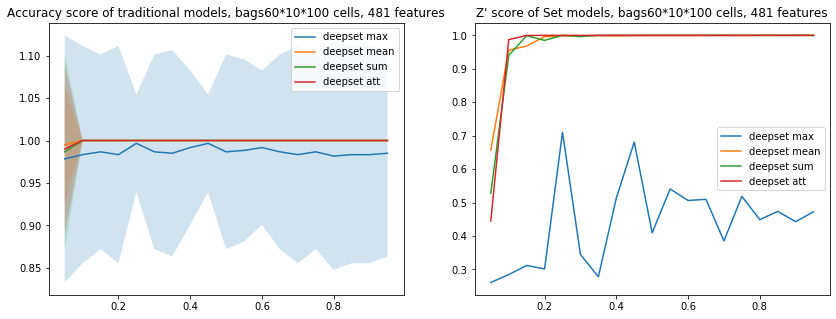

In [24]:

produce_setfig(path,set_list,"set.png")

In [14]:
def produce_setfig(path, table_list, save_name):
    plt.figure(figsize=(14, 5))
    for i in table_list:
        table = pd.read_csv(path + i, index_col=0)
        table = table.sort_index()
        model_name = "_".join(i.split("_")[0:1])
        pool = "_".join(i.split("_")[1:2]).split("0")[0]
        number_bag = "_".join(i.split("_")[2:3])+"*100"
        feature_size = 481 
        ax = plt.subplot(1,2,1)
        plt.plot([i/100 for i in range(5,96,5)], table["mean_accuracy"], '-',label = model_name +" "+ pool)
        plt.fill_between([i/100 for i in range(5,96,5)], 
                     (table["mean_accuracy"])-table["std_accuracy"], table["mean_accuracy"]+table["std_accuracy"], alpha=0.2)
        ax.legend()
        ax.set_title("Accuracy score of traditional models, %s cells, %s features"%(number_bag, feature_size))

        ax = plt.subplot(1,2,2)
        z_score = 1-3*(table["std_pred_score_treatment"]+table["std_pred_score_control"])/(np.abs(table["mean_pred_score_treatment"]-table["mean_pred_score_control"]))
        plt.plot([i/100 for i in range(5,96,5)], z_score, '-', label = model_name +" "+ pool)
        ax.set_title("Z' score of Set models, %s cells, %s features"%(number_bag, feature_size))
        ax.legend()
    plt.savefig(save_name)

In [127]:
def produce_fig(path, table_list, save_name):
    plt.figure(figsize=(14, 5))
    for i in table_list:
        table = pd.read_csv(path + i, index_col=0)
        table = table.sort_index()
        model_name = "_".join(i.split("_")[0:1])
        number_cell = "_".join(i.split("_")[1:2])[6:11]
        feature_size = 481 
        ax = plt.subplot(1,2,1)
        plt.plot([i/100 for i in range(5,96,5)], table["mean_accuracy"], '-',label = model_name)
        plt.fill_between([i/100 for i in range(5,96,5)], 
                     (table["mean_accuracy"])-table["std_accuracy"], table["mean_accuracy"]+table["std_accuracy"], alpha=0.2)
        ax.legend()

        ax.set_title("Accuracy score of traditional models, %s cells, %s features"%(number_cell, feature_size))

        ax = plt.subplot(1,2,2)
        z_score = 1-3*(table["std_pred_score_treatment"]+table["std_pred_score_control"])/(np.abs(table["mean_pred_score_treatment"]-table["mean_pred_score_control"]))
        plt.plot([i/100 for i in range(5,96,5)], z_score, '-', label = model_name)
        ax.set_title("Z' score of traditional models, %s cells, %s features"%(number_cell, feature_size))
        ax.legend()
    plt.savefig(save_name)

In [4]:
def plot_ds_acc(path, file_name):
    table = pd.read_csv(path + file_name, index_col=0)
    table = table.sort_index()
    z_score = 1-3*(table["std_pred_score_treatment"]+table["std_pred_score_control"])/(np.abs(table["mean_pred_score_treatment"]-table["mean_pred_score_control"]))

    model_name = "_".join(file_name.split("_")[0:2])
    feature_size = 481

    plt.figure(figsize=(14, 5))
    ax = plt.subplot(1,2,1)
    plt.plot([i/100 for i in range(5,96,5)], table["mean_accuracy"], '-')
    plt.fill_between([i/100 for i in range(5,96,5)], 
                     (table["mean_accuracy"])-table["std_accuracy"], table["mean_accuracy"]+table["std_accuracy"], alpha=0.2)
    ax.set_title("Accuracy score of %s, %s cells, %s features"%(model_name, 100, feature_size))

    ax = plt.subplot(1,2,2)
    plt.plot([i/100 for i in range(5,96,5)], z_score, '-')
    ax.set_title("Z_score of %s, %s cells, %s features"%(model_name, 100, feature_size))

    plt.savefig("%s_sample%s_feature%s.png" %(model_name, 10000, feature_size))

KeyError: 'mean_accuracy'

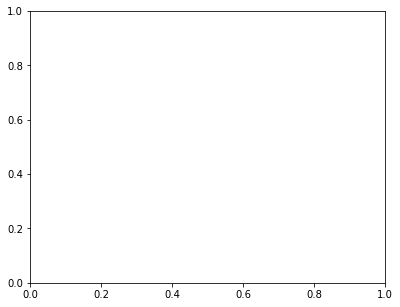

In [5]:
path = "./"
file_name = "RandomForestClassifier_sample500_feature481.csv"

plot_ds_acc(path,file_name)

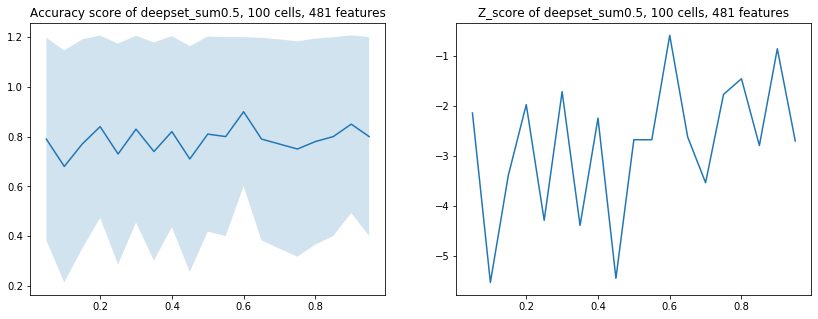

In [12]:
path = "./deepset_result_Nov1/"
file_name = "deepset_sum0.5_bags100_bagsize100_feature481.csv"

plot_ds_acc(path,file_name)

# AttentionSet Model

In [3]:
start = 90
end = 91
# data = mini_data
num_bag = 100
bag_size_mean = 200
bag_size_std = 10
treatment = "taxol"
control = "DMSO"
model = profile_AttSet(481).cuda()#FullDeepSet("mean").cuda()
# optimizer = optimizer
splits = 3
epochs = 20

In [8]:
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), weight_decay=10e-5)

In [ ]:
model

In [9]:
results = mini_noise_signal_cv(start, end, data, num_bag,
                               bag_size_mean, bag_size_std, 
                               treatment, control, model, 
                               optimizer, splits, epochs)

training at different percent:   0%|          | 0/1 [00:00<?, ?it/s]
3 fold cross validation: 0it [00:00, ?it/s]

Epoch: 0, Loss: 0.6145, Train error: 0.3030
Epoch: 1, Loss: 0.1944, Train error: 0.0455
Epoch: 2, Loss: 0.0228, Train error: 0.0000
Epoch: 3, Loss: 0.0078, Train error: 0.0000
Epoch: 4, Loss: 0.0030, Train error: 0.0000
Epoch: 5, Loss: 0.0013, Train error: 0.0000
Epoch: 6, Loss: 0.0008, Train error: 0.0000
Epoch: 7, Loss: 0.0005, Train error: 0.0000
Epoch: 8, Loss: 0.0005, Train error: 0.0000
Epoch: 9, Loss: 0.0004, Train error: 0.0000
Epoch: 10, Loss: 0.0003, Train error: 0.0000
Epoch: 11, Loss: 0.0003, Train error: 0.0000
Epoch: 12, Loss: 0.0003, Train error: 0.0000
Epoch: 13, Loss: 0.0003, Train error: 0.0000
Epoch: 14, Loss: 0.0003, Train error: 0.0000
Epoch: 15, Loss: 0.0003, Train error: 0.0000
Epoch: 16, Loss: 0.0003, Train error: 0.0000
Epoch: 17, Loss: 0.0003, Train error: 0.0000
Epoch: 18, Loss: 0.0003, Train error: 0.0000
Epoch: 19, Loss: 0.0002, Train error: 0.0000



3 fold cross validation: 1it [00:16, 16.51s/it]

Epoch: 0, Loss: 0.0002, Train error: 0.0000
Epoch: 1, Loss: 0.0002, Train error: 0.0000
Epoch: 2, Loss: 0.0002, Train error: 0.0000
Epoch: 3, Loss: 0.0002, Train error: 0.0000
Epoch: 4, Loss: 0.0002, Train error: 0.0000
Epoch: 5, Loss: 0.0003, Train error: 0.0000
Epoch: 6, Loss: 0.0002, Train error: 0.0000
Epoch: 7, Loss: 0.0002, Train error: 0.0000
Epoch: 8, Loss: 0.0003, Train error: 0.0000
Epoch: 9, Loss: 0.0003, Train error: 0.0000
Epoch: 10, Loss: 0.0002, Train error: 0.0000
Epoch: 11, Loss: 0.0003, Train error: 0.0000
Epoch: 12, Loss: 0.0002, Train error: 0.0000
Epoch: 13, Loss: 0.0003, Train error: 0.0000
Epoch: 14, Loss: 0.0002, Train error: 0.0000
Epoch: 15, Loss: 0.0003, Train error: 0.0000
Epoch: 16, Loss: 0.0002, Train error: 0.0000
Epoch: 17, Loss: 0.0003, Train error: 0.0000
Epoch: 18, Loss: 0.0003, Train error: 0.0000
Epoch: 19, Loss: 0.0003, Train error: 0.0000



3 fold cross validation: 2it [00:33, 16.58s/it]

Epoch: 0, Loss: 0.0002, Train error: 0.0000
Epoch: 1, Loss: 0.0002, Train error: 0.0000
Epoch: 2, Loss: 0.0003, Train error: 0.0000
Epoch: 3, Loss: 0.0002, Train error: 0.0000
Epoch: 4, Loss: 0.0003, Train error: 0.0000
Epoch: 5, Loss: 0.0002, Train error: 0.0000
Epoch: 6, Loss: 0.0002, Train error: 0.0000
Epoch: 7, Loss: 0.0002, Train error: 0.0000
Epoch: 8, Loss: 0.0002, Train error: 0.0000
Epoch: 9, Loss: 0.0002, Train error: 0.0000
Epoch: 10, Loss: 0.0002, Train error: 0.0000
Epoch: 11, Loss: 0.0002, Train error: 0.0000
Epoch: 12, Loss: 0.0002, Train error: 0.0000
Epoch: 13, Loss: 0.0002, Train error: 0.0000
Epoch: 14, Loss: 0.0002, Train error: 0.0000
Epoch: 15, Loss: 0.0003, Train error: 0.0000
Epoch: 16, Loss: 0.0002, Train error: 0.0000
Epoch: 17, Loss: 0.0002, Train error: 0.0000
Epoch: 18, Loss: 0.0002, Train error: 0.0000
Epoch: 19, Loss: 0.0002, Train error: 0.0000



3 fold cross validation: 3it [00:48, 16.07s/it]
training at different percent:   0%|          | 0/1 [00:48<?, ?it/s]


In [165]:
profile_model_attset = profile_AttSet(2)

In [9]:
dic = {}
# Set different percentage of treatment v.s. control 
for j in tqdm(range(start, end, 5), desc = "training at different percent"):
    X, y = data_label_split(data)
    y = y["compound"]

    acc_control_list = []
    acc_treat_list = []
    pred_score_control_list = []
    pred_score_treat_list = []
    # Stratified K fold 
    skf = StratifiedKFold(n_splits = splits)
    for i, (train_index, test_index) in tqdm(enumerate(skf.split(X, y)), desc="%d fold cross validation"%splits):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]  
        X_train = pd.concat([X_train, y_train], axis=1, sort=False)
        X_test = pd.concat([X_test, y_test], axis=1, sort=False)

        # Redefine dataloader and train model at each fold
        train_dataset = dmso_taxol_ProfileBag(X_train, int(num_bag*(splits-1)/splits), bag_size_mean, bag_size_std, j/100, treatment, control, 0.5)
        valida_dataset = dmso_taxol_ProfileBag(X_test, int(num_bag/splits), bag_size_mean, bag_size_std, j/100, treatment, control, 0.5)
        train_loader = D.DataLoader(train_dataset, batch_size=1, shuffle=True)
        valida_loader = D.DataLoader(valida_dataset, batch_size=1, shuffle=True)
        acc_control, acc_treat, pred_score_control, pred_score_treat = test(model, valida_loader)
        

Control accuracy:0.000, Treat accuracy:1.000, overally accuray:0.485
Control accuracy:0.000, Treat accuracy:1.000, overally accuray:0.485
Control accuracy:0.000, Treat accuracy:1.000, overally accuray:0.485




In [25]:
for i in range(len(valida_dataset)):
    get_taxol_perc(valida_dataset[i][1][1])

0.8979591836734694
0.8994708994708994
0.8985507246376812
0.8990384615384616
0.8970588235294118
0.9
0.9
0.8963730569948186
0.8994708994708994
0.8979591836734694
0.8986175115207373
0.8974358974358975
0.8958333333333334
0.8958333333333334
0.8958333333333334
0.8983957219251337
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [57]:
table = pd.read_csv(path + file_name, index_col=0)
table = table.sort_index()

In [58]:
table

,mean_accuracy,std_accuracy,mean_control_accuracy,std_control_accuracy,mean_treat_accuracy,std_treat_accuracy,mean_pred_score_control,std_pred_score_control,mean_pred_score_treatment,std_pred_score_treatment
0.05,0.80,0.400000,0.88,0.324962,0.72,0.448999,0.141478,0.277232,0.712987,0.387560
0.10,0.89,0.312890,0.90,0.300000,0.88,0.324962,0.134525,0.247329,0.842480,0.296975
0.15,0.92,0.271293,0.96,0.195959,0.88,0.324962,0.034166,0.132680,0.844991,0.318048
0.20,0.80,0.400000,0.84,0.366606,0.76,0.427083,0.155384,0.333898,0.754050,0.352207
0.25,0.74,0.438634,0.94,0.237487,0.54,0.498397,0.069832,0.199288,0.540951,0.434158
0.30,0.73,0.443959,0.90,0.300000,0.56,0.496387,0.086292,0.242811,0.553302,0.458849
0.35,0.76,0.427083,0.90,0.300000,0.62,0.485386,0.089969,0.240103,0.568509,0.433161
0.40,0.67,0.470213,0.92,0.271293,0.42,0.493559,0.084601,0.227860,0.419830,0.464556
0.45,0.70,0.458258,0.98,0.140000,0.42,0.493559,0.026933,0.140980,0.412991,0.485577
0.50,0.67,0.470213,0.96,0.195959,0.38,0.485386,0.039382,0.192817,0.366484,0.470740


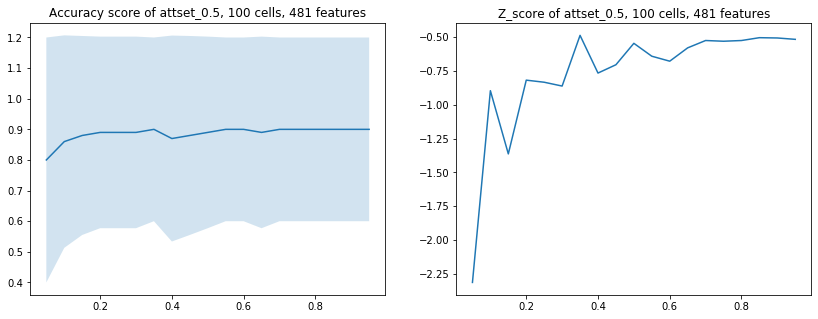

In [13]:
path = "./"
file_name = "attset_0.5_bags100_bagsize100_feature481.csv"

plot_ds_acc(path,file_name)

In [7]:
dataset = dmso_taxol_ProfileBag(mini_data, 10, 11, 1, 5/100, "taxol", "DMSO", 8, 0.5,False)

In [9]:
train_loader = D.DataLoader(dataset, batch_size=1, shuffle=True)

In [10]:
x1,y1 = iter(train_loader).next()